# Task
Analyze customer data from "Customer.csv", "Product.csv", "Order.csv", and "Orderdetails.csv" by merging, cleaning, and preprocessing the datasets. Perform exploratory data analysis with various visualizations. Conduct customer segmentation using K-Means, build a churn prediction model, and perform market basket analysis. Export the segmented customer data to a CSV file and summarize key findings from all analytical steps.

## Load and Preprocess Data

### Subtask:
Load the 'Customer.csv', 'Product.csv', 'Order.csv', and 'Orderdetails.csv' datasets. Merge them as necessary to create a unified dataset. Handle missing values, correct data types, and perform any initial data cleaning and feature engineering required for subsequent analyses.


**Reasoning**:
First, I'll import the pandas library and load all four CSV files ('Customer.csv', 'Product.csv', 'Order.csv', and 'Orderdetails.csv') into separate pandas DataFrames as instructed. This is a foundational step for all subsequent data manipulation.



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [1]:
# Load the datasets
df_customer = pd.read_csv('Customer.csv')
df_product = pd.read_csv('Product.csv')
df_order = pd.read_csv('Order.csv')
df_order_details = pd.read_csv('Orderdetails.csv')

print("Datasets loaded successfully.")

Datasets loaded successfully.


**Reasoning**:
Now that the datasets are loaded, I will display the first few rows and summary information for each DataFrame to understand their structure, columns, and data types, as per the instructions.



In [2]:
print("\n--- Customer DataFrame --- ")
print(df_customer.head())
print(df_customer.info())

print("\n--- Product DataFrame --- ")
print(df_product.head())
print(df_product.info())

print("\n--- Order DataFrame --- ")
print(df_order.head())
print(df_order.info())

print("\n--- Order Details DataFrame --- ")
print(df_order_details.head())
print(df_order_details.info())


--- Customer DataFrame --- 
  CustomerID             Name  Gender  Age     City  SignupDate
0       C001      Zeeshan Sur    Male   50     Pune  2024-05-24
1       C002     Saksham Iyer    Male   27  Kolkata  2024-04-14
2       C003     Neysa Karnik  Female   26  Chennai  2024-01-19
3       C004        Ivan Ravi  Female   24  Chennai  2024-06-05
4       C005  Navya Chaudhuri  Female   47  Kolkata  2025-02-23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  500 non-null    object
 1   Name        500 non-null    object
 2   Gender      500 non-null    object
 3   Age         500 non-null    int64 
 4   City        500 non-null    object
 5   SignupDate  500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB
None

--- Product DataFrame --- 
  ProductID          ProductName     Category  UnitPrice_INR  \
0      P001    

In [3]:
df_merged_product = pd.merge(df_order_details, df_product, on='ProductID', how='left')
print(df_merged_product.head())
print(df_merged_product.info())

  DetailID OrderID ProductID  Quantity  LineTotal_INR             ProductName  \
0   D00001  O01592      P056         4      129664.28            Hic Clothing   
1   D00002  O00532      P063         5        1462.35  Voluptatum Electronics   
2   D00003  O00259      P187         2       29671.70       Placeat Groceries   
3   D00004  O00025      P085         4       79583.56    Blanditiis Groceries   
4   D00005  O01475      P106         3       69847.14        Dolorem Clothing   

      Category  UnitPrice_INR                       Brand  
0     Clothing       32416.07                    Brar PLC  
1  Electronics         292.47                   Lad-Sahni  
2    Groceries       14835.85  Ranganathan, Buch and Toor  
3    Groceries       19895.89                 Goswami LLC  
4     Clothing       23282.38      Sankar, Baral and Sami  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---

**Reasoning**:
Following the instructions, I will now merge the `df_merged_product` DataFrame (which contains order details and product information) with the `df_order` DataFrame. The common column between them is 'OrderID', and a left merge will preserve all the detailed product order information.



In [4]:
df_merged_order_product = pd.merge(df_merged_product, df_order, on='OrderID', how='left')
print(df_merged_order_product.head())
print(df_merged_order_product.info())

  DetailID OrderID ProductID  Quantity  LineTotal_INR             ProductName  \
0   D00001  O01592      P056         4      129664.28            Hic Clothing   
1   D00002  O00532      P063         5        1462.35  Voluptatum Electronics   
2   D00003  O00259      P187         2       29671.70       Placeat Groceries   
3   D00004  O00025      P085         4       79583.56    Blanditiis Groceries   
4   D00005  O01475      P106         3       69847.14        Dolorem Clothing   

      Category  UnitPrice_INR                       Brand CustomerID  \
0     Clothing       32416.07                    Brar PLC       C326   
1  Electronics         292.47                   Lad-Sahni       C473   
2    Groceries       14835.85  Ranganathan, Buch and Toor       C034   
3    Groceries       19895.89                 Goswami LLC       C412   
4     Clothing       23282.38      Sankar, Baral and Sami       C476   

    OrderDate Channel PaymentMode  
0  2025-01-31     App        Cash  
1  2025-

**Reasoning**:
As per the instructions, I will now merge the `df_merged_order_product` DataFrame with the `df_customer` DataFrame. The common column is 'CustomerID', and a left merge will ensure all order and product details are retained while adding customer information.



In [5]:
df_merged = pd.merge(df_merged_order_product, df_customer, on='CustomerID', how='left')
print(df_merged.head())
print(df_merged.info())

  DetailID OrderID ProductID  Quantity  LineTotal_INR             ProductName  \
0   D00001  O01592      P056         4      129664.28            Hic Clothing   
1   D00002  O00532      P063         5        1462.35  Voluptatum Electronics   
2   D00003  O00259      P187         2       29671.70       Placeat Groceries   
3   D00004  O00025      P085         4       79583.56    Blanditiis Groceries   
4   D00005  O01475      P106         3       69847.14        Dolorem Clothing   

      Category  UnitPrice_INR                       Brand CustomerID  \
0     Clothing       32416.07                    Brar PLC       C326   
1  Electronics         292.47                   Lad-Sahni       C473   
2    Groceries       14835.85  Ranganathan, Buch and Toor       C034   
3    Groceries       19895.89                 Goswami LLC       C412   
4     Clothing       23282.38      Sankar, Baral and Sami       C476   

    OrderDate Channel PaymentMode                  Name  Gender  Age  \
0  2025-

**Reasoning**:
Following the instructions, I will now check for any missing values in the `df_merged` DataFrame using the `isnull().sum()` method to understand the completeness of our unified dataset.



In [ ]:
print(df_merged.isnull().sum())


--- Missing values in df_merged ---
DetailID         0
OrderID          0
ProductID        0
Quantity         0
LineTotal_INR    0
ProductName      0
Category         0
UnitPrice_INR    0
Brand            0
CustomerID       0
OrderDate        0
Channel          0
PaymentMode      0
Name             0
Gender           0
Age              0
City             0
SignupDate       0
dtype: int64


**Reasoning**:
As per the instructions, I will inspect the data types of columns in `df_merged` using `info()` and then convert 'OrderDate' and 'SignupDate' to datetime objects to ensure they are in their appropriate data type for further analysis.



In [6]:
print(df_merged.info())

# Convert date columns to datetime objects
df_merged['OrderDate'] = pd.to_datetime(df_merged['OrderDate'])
df_merged['SignupDate'] = pd.to_datetime(df_merged['SignupDate'])
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DetailID       5000 non-null   object 
 1   OrderID        5000 non-null   object 
 2   ProductID      5000 non-null   object 
 3   Quantity       5000 non-null   int64  
 4   LineTotal_INR  5000 non-null   float64
 5   ProductName    5000 non-null   object 
 6   Category       5000 non-null   object 
 7   UnitPrice_INR  5000 non-null   float64
 8   Brand          5000 non-null   object 
 9   CustomerID     5000 non-null   object 
 10  OrderDate      5000 non-null   object 
 11  Channel        5000 non-null   object 
 12  PaymentMode    5000 non-null   object 
 13  Name           5000 non-null   object 
 14  Gender         5000 non-null   object 
 15  Age            5000 non-null   int64  
 16  City           5000 non-null   object 
 17  SignupDate     5000 non-null   object 
dtypes: float

**Reasoning**:
As per the instructions, I will now create a new column named `TotalPrice` in `df_merged` by multiplying the `Quantity` and `UnitPrice_INR` columns. I have already confirmed that both columns are numeric, so no explicit type conversion is needed prior to this step.



In [10]:
df_merged['TotalPrice'] = df_merged['Quantity'] * df_merged['UnitPrice_INR']
print(df_merged[['Quantity', 'UnitPrice_INR', 'TotalPrice']].head())
print(df_merged.info())

   Quantity  UnitPrice_INR  TotalPrice
0         4       32416.07   129664.28
1         5         292.47     1462.35
2         2       14835.85    29671.70
3         4       19895.89    79583.56
4         3       23282.38    69847.14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DetailID       5000 non-null   object        
 1   OrderID        5000 non-null   object        
 2   ProductID      5000 non-null   object        
 3   Quantity       5000 non-null   int64         
 4   LineTotal_INR  5000 non-null   float64       
 5   ProductName    5000 non-null   object        
 6   Category       5000 non-null   object        
 7   UnitPrice_INR  5000 non-null   float64       
 8   Brand          5000 non-null   object        
 9   CustomerID     5000 non-null   object        
 10  OrderDate      5000 non-null   datetime64[

## Perform Exploratory Data Analysis (EDA)

### Subtask:
Generate descriptive statistics for the cleaned dataset and create various visualizations such as histograms and bar charts to understand data distributions and identify outliers.


**Reasoning**:
Following the instructions, I will display descriptive statistics for all numerical columns in the `df_merged` DataFrame to get an overview of their central tendency, dispersion, and shape of distribution.



In [8]:
print(df_merged.describe())

          Quantity  LineTotal_INR  UnitPrice_INR                   OrderDate  \
count  5000.000000    5000.000000    5000.000000                        5000   
mean      4.450600  108699.540306   24582.384006  2024-11-03 17:04:24.960000   
min       1.000000      72.600000      72.600000         2023-11-05 00:00:00   
25%       2.000000   35056.080000   10605.130000         2024-05-08 18:00:00   
50%       4.000000   84144.390000   25355.680000         2024-11-01 00:00:00   
75%       6.000000  166336.800000   36997.770000         2025-05-01 00:00:00   
max       8.000000  398664.560000   49833.070000         2025-11-04 00:00:00   
std       2.278025   91069.619978   14573.427631                         NaN   

               Age                  SignupDate     TotalPrice  
count  5000.000000                        5000    5000.000000  
mean     40.696000  2024-05-26 08:30:20.160000  108699.540306  
min      18.000000         2022-11-06 00:00:00      72.600000  
25%      28.000000     

**Reasoning**:
As per the instructions, I will now display descriptive statistics for categorical columns in the `df_merged` DataFrame using the `.describe(include='object')` method to understand their unique values, frequencies, and top categories.



In [9]:
print(df_merged.describe(include='object'))

       DetailID OrderID ProductID    ProductName  Category     Brand  \
count      5000    5000      5000           5000      5000      5000   
unique     5000    1828       200            183         5       199   
top      D05000  O01292      P034  A Electronics  Clothing  Mani Inc   
freq          1       9        39             74      1281        48   

       CustomerID Channel PaymentMode            Name Gender    City  
count        5000    5000        5000            5000   5000    5000  
unique        487       3           3             487      2       8  
top          C376   Store        Cash  Shayak Chokshi   Male  Mumbai  
freq           36    1701        1758              36   2560     725  


**Reasoning**:
As instructed, I will now create histograms for the numerical columns 'Age', 'Quantity', 'UnitPrice_INR', and 'TotalPrice' to visualize their distributions, ensuring each plot has a title and axis labels.



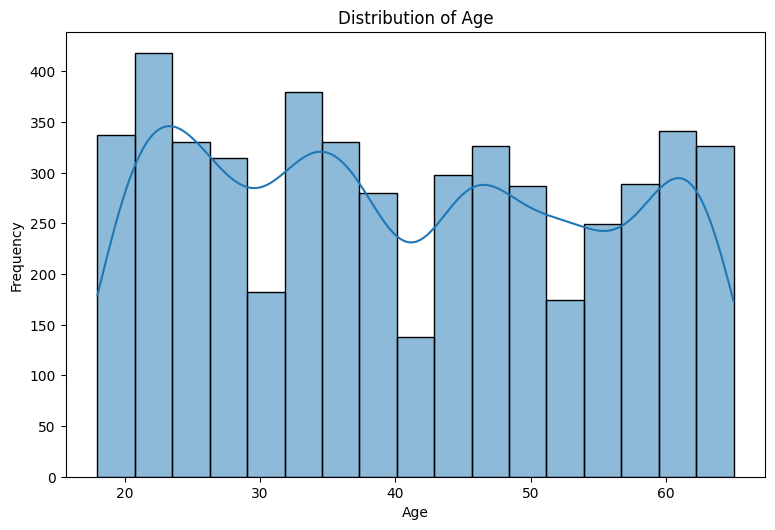

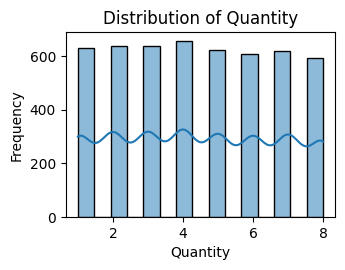

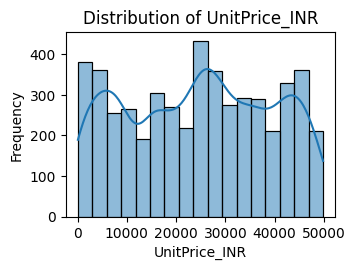

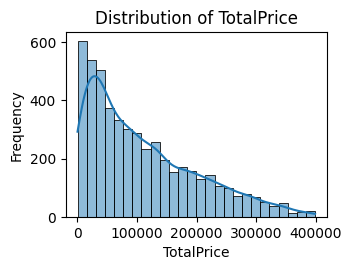

In [14]:
numerical_cols = ['Age', 'Quantity', 'UnitPrice_INR', 'TotalPrice']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_merged[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


**Reasoning**:
As per the instructions, I will now create bar charts for the categorical columns 'Gender', 'City', 'Category', 'Channel', and 'PaymentMode' to visualize their frequency distributions. Each bar chart will have a title and axis labels.



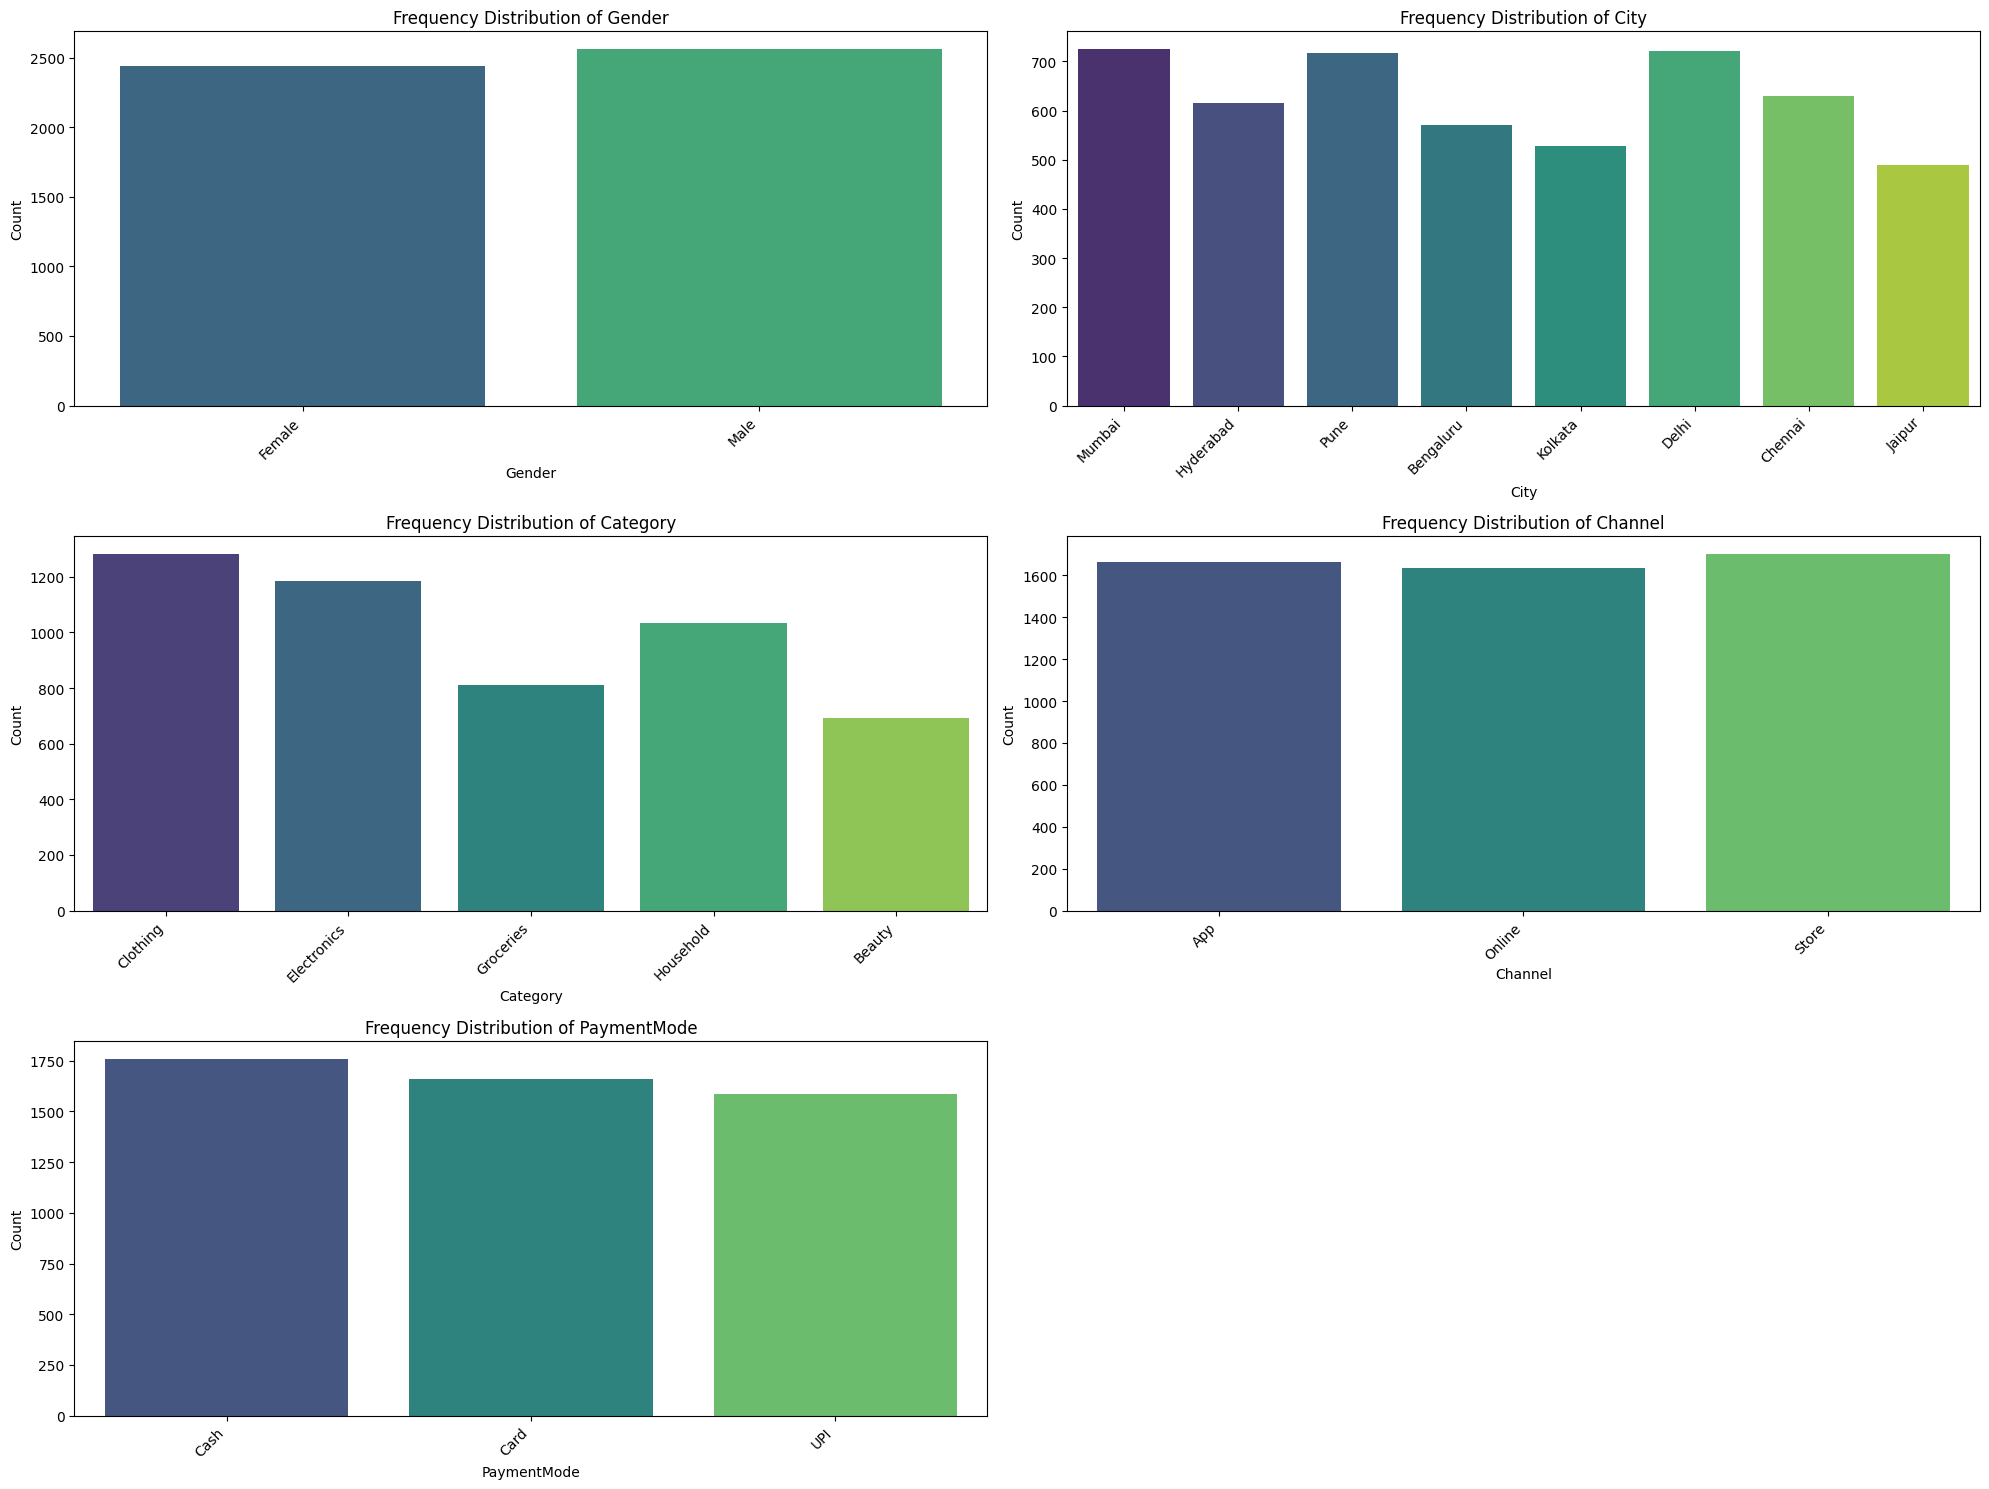

In [18]:
categorical_cols = ['Gender', 'City', 'Category', 'Channel', 'PaymentMode']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.countplot(data=df_merged, x=col, palette='viridis')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


**Reasoning**:
The previous code block generated a `FutureWarning` from seaborn regarding the `palette` argument when `hue` is not assigned. To address this, I will modify the `sns.countplot` call by setting `hue=col` and `legend=False` as suggested by the warning.



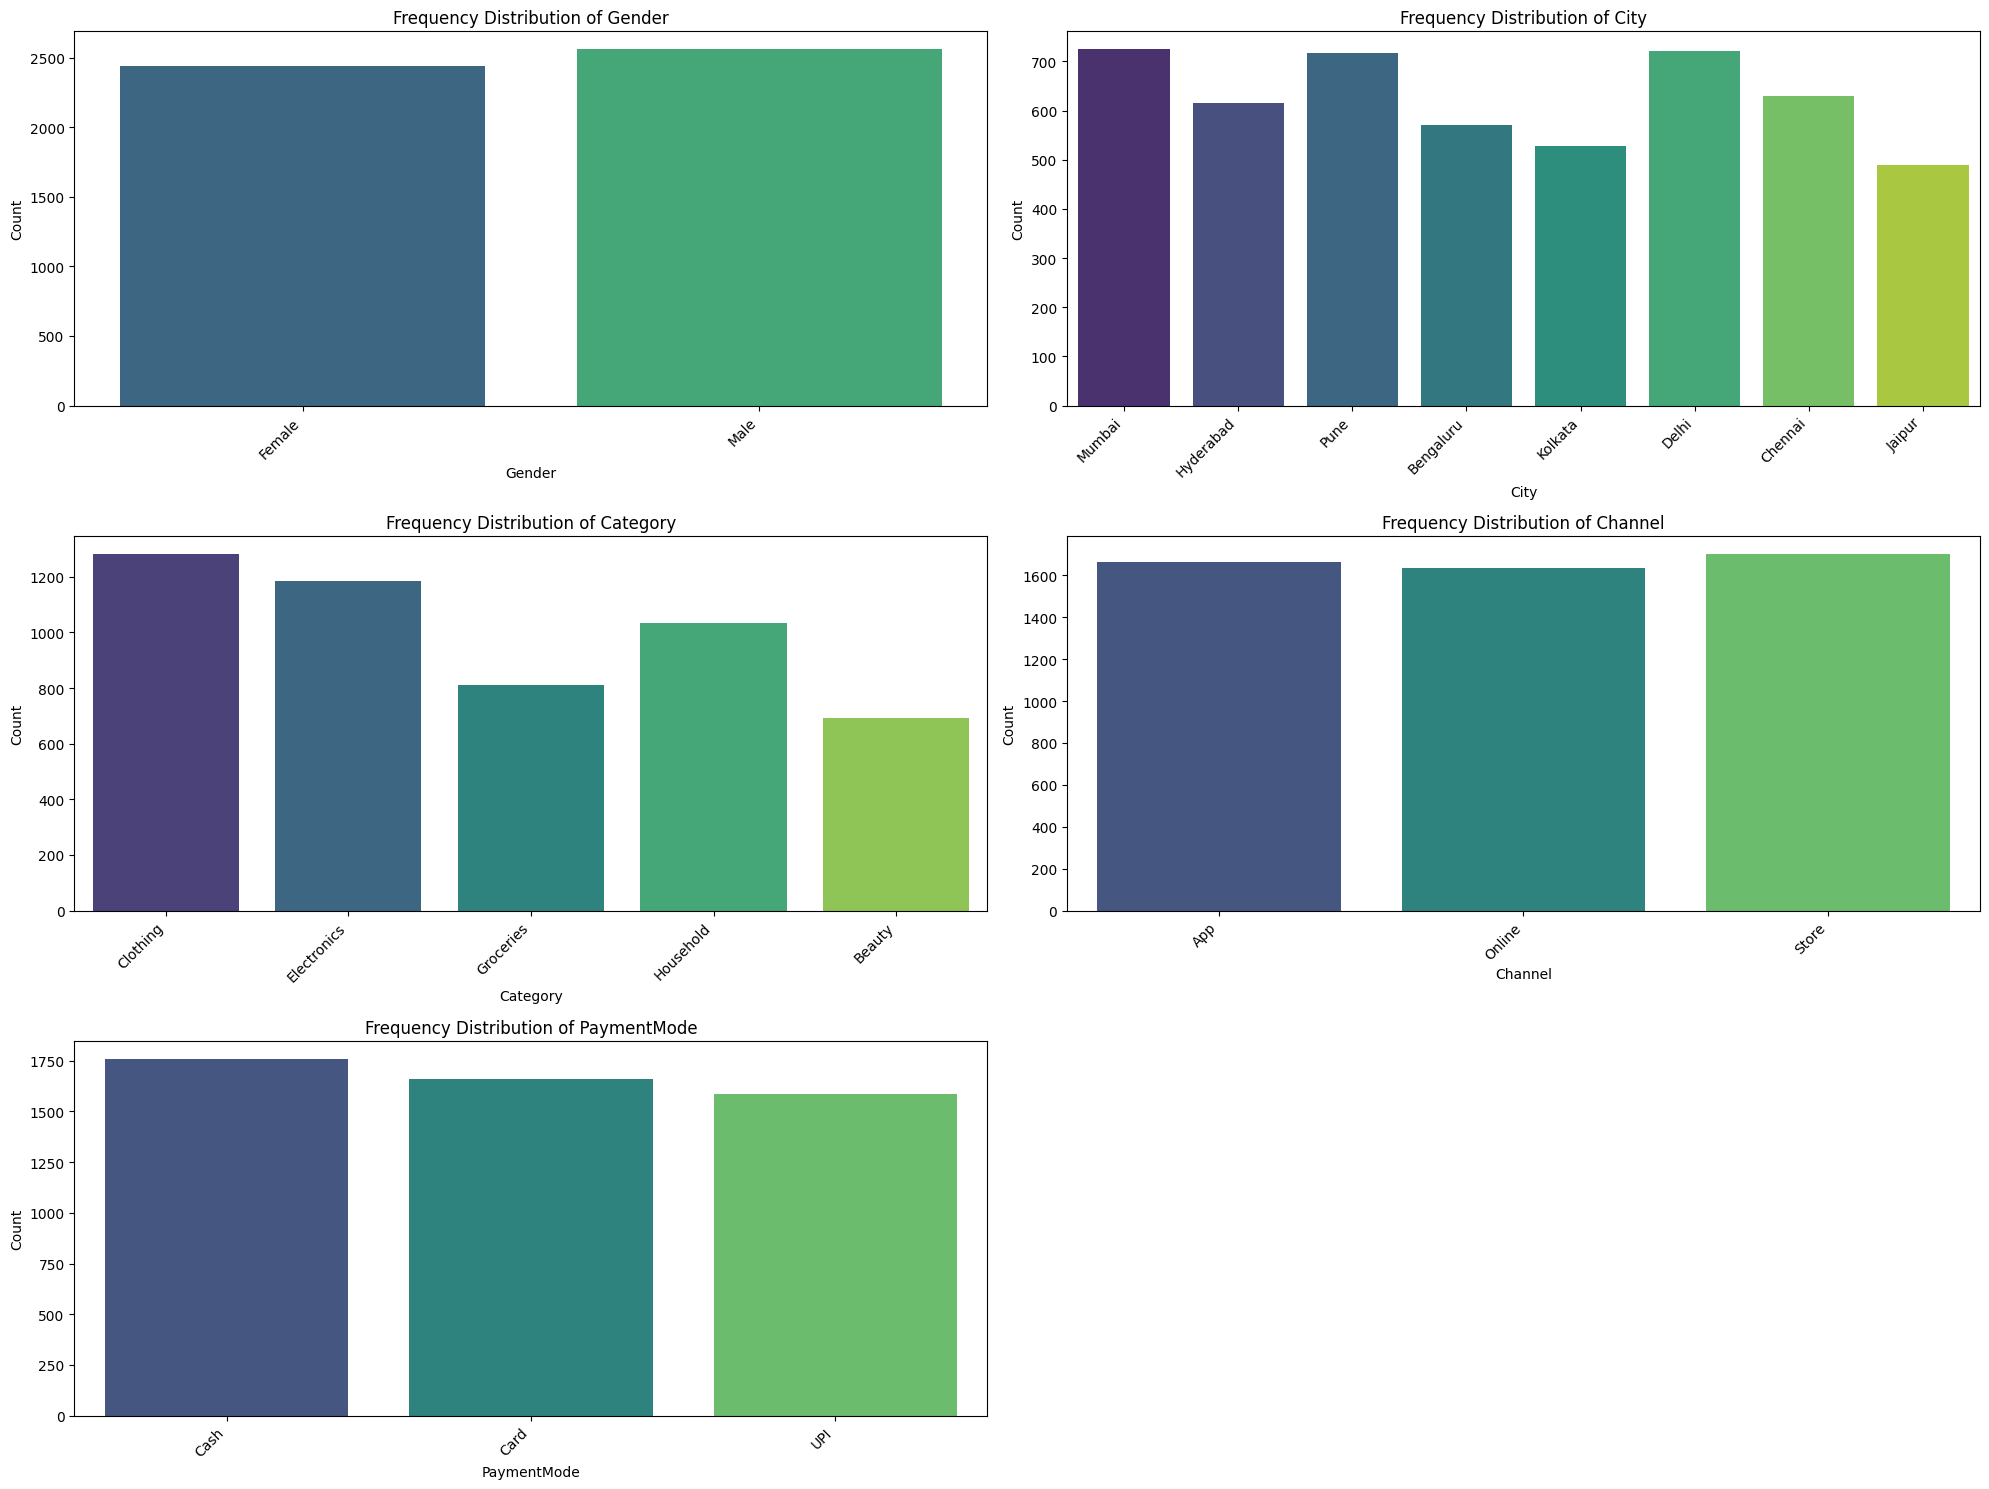

In [19]:
categorical_cols = ['Gender', 'City', 'Category', 'Channel', 'PaymentMode']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.countplot(data=df_merged, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Perform Exploratory Data Analysis (EDA)

Create scatter plots and box plots to further understand data distributions, identify outliers, and explore relationships between key variables.


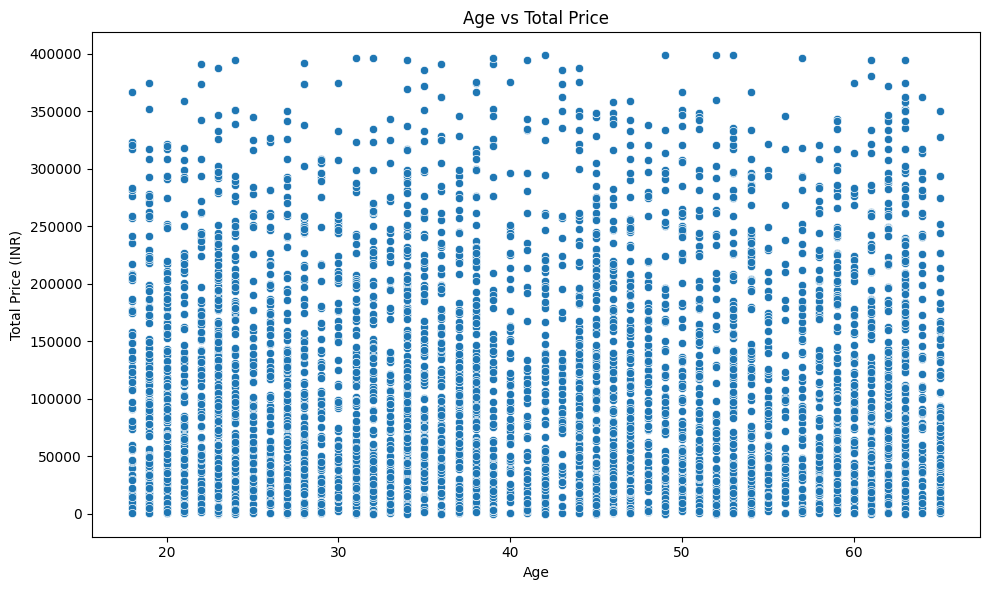

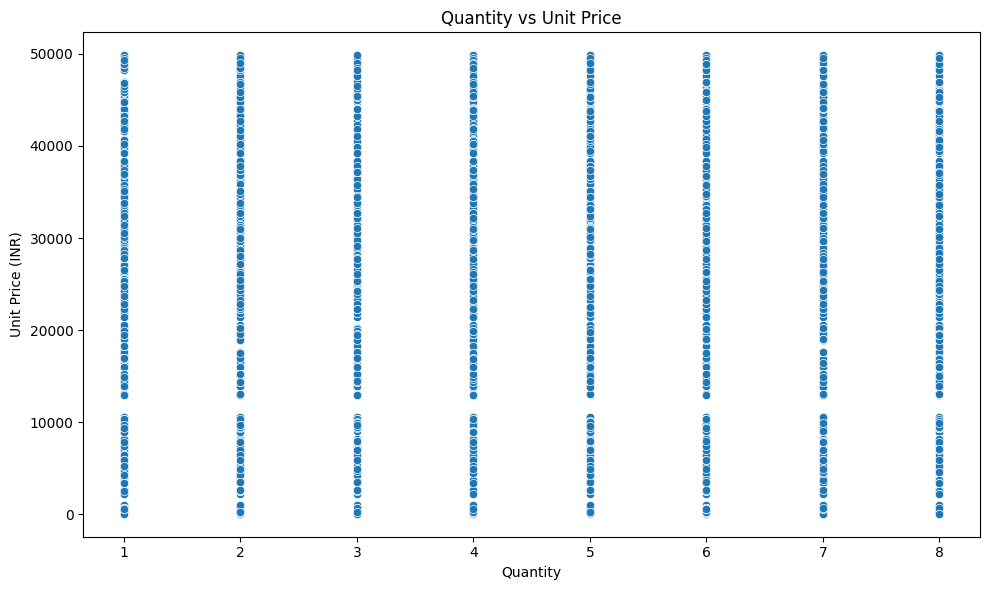

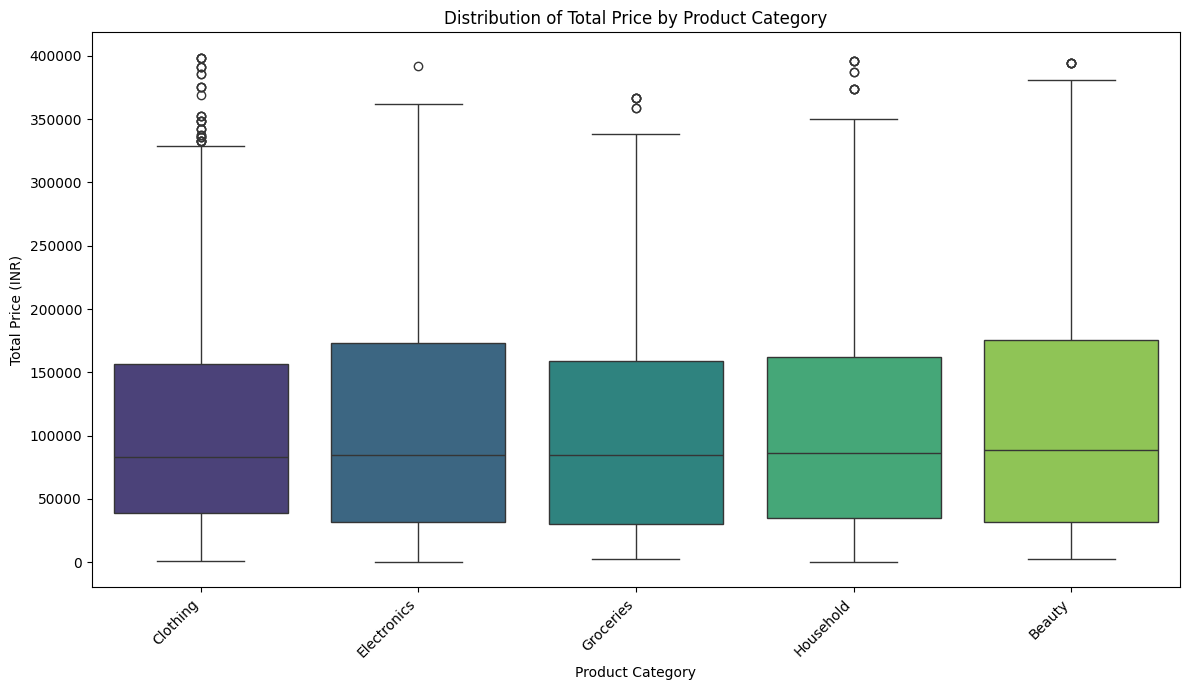

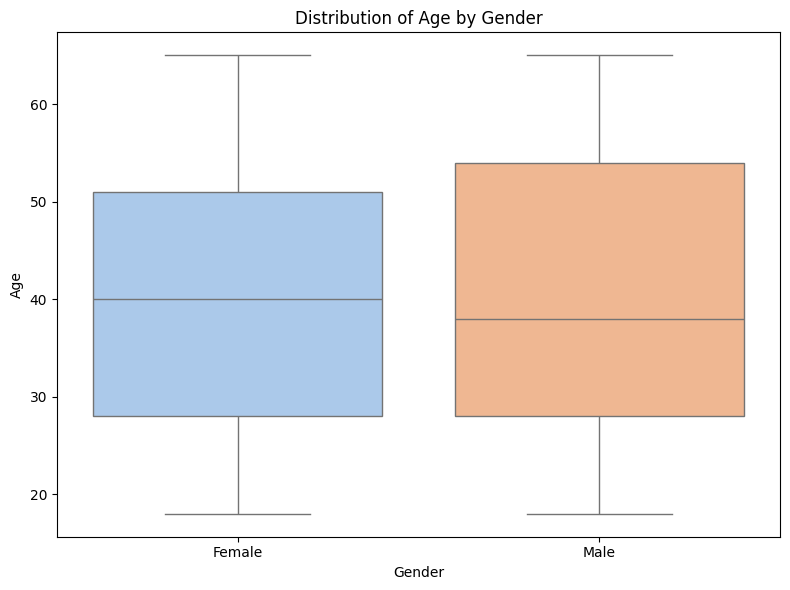

In [20]:
# Scatter plot: Age vs TotalPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Age', y='TotalPrice')
plt.title('Age vs Total Price')
plt.xlabel('Age')
plt.ylabel('Total Price (INR)')
plt.tight_layout()
plt.show()

# Scatter plot: Quantity vs UnitPrice_INR
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Quantity', y='UnitPrice_INR')
plt.title('Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price (INR)')
plt.tight_layout()
plt.show()

# Box plot: TotalPrice by Category
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_merged, x='Category', y='TotalPrice', palette='viridis')
plt.title('Distribution of Total Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Price (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Box plot: Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_merged, x='Gender', y='Age', palette='pastel')
plt.title('Distribution of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


## Prepare dataset for customer segmentation (RFM)

### Subtask:
Calculate Recency, Frequency, and Monetary (RFM) values for each customer from the `df_merged` DataFrame.


**Reasoning**:
As per the instructions, I will first determine a 'current date' by finding the maximum 'OrderDate' in the `df_merged` DataFrame and adding one day to it. This `current_date` will be used for the recency calculation to ensure all recency values are positive.



In [23]:
import datetime

# 1. Determine a 'current date' for recency calculation
current_date = df_merged['OrderDate'].max() + datetime.timedelta(days=1)
print(f"Current date for RFM calculation: {current_date}")

Current date for RFM calculation: 2025-11-05 00:00:00


**Reasoning**:
As per the instructions, I will now group the `df_merged` DataFrame by `CustomerID` and calculate Recency, Frequency, and Monetary values. Recency will be calculated as the number of days between the `current_date` and the customer's last order date. Frequency will be the count of unique `OrderID`s, and Monetary will be the sum of `TotalPrice` for each customer. These values will be stored in a new DataFrame called `df_rfm`.



In [27]:
df_rfm = df_merged.groupby('CustomerID').agg(
    Recency=('OrderDate', lambda date: (current_date - date.max()).days),
    Frequency=('OrderID', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()


print(df_rfm.head())
print(df_rfm.info())

  CustomerID  Recency  Frequency    Monetary
0       C001      194          3  1054522.82
1       C003       48          4   406422.59
2       C004       84          3   458292.24
3       C005      101          2   982526.28
4       C006      140          3   937577.66
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  487 non-null    object 
 1   Recency     487 non-null    int64  
 2   Frequency   487 non-null    int64  
 3   Monetary    487 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.3+ KB
None


## Customer Segmentation using K-Means


Scale the RFM features, determine the optimal number of clusters using the elbow method, and apply the K-Means clustering algorithm.


**Reasoning**:
As per the instructions, I will first extract the 'Recency', 'Frequency', and 'Monetary' columns from the `df_rfm` DataFrame to create a new DataFrame (`df_rfm_features`) that will be used for clustering.



In [26]:
df_rfm_features = df_rfm[['Recency', 'Frequency', 'Monetary']]

print(df_rfm_features.head())
print(df_rfm_features.info())

   Recency  Frequency    Monetary
0      194          3  1054522.82
1       48          4   406422.59
2       84          3   458292.24
3      101          2   982526.28
4      140          3   937577.66
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    487 non-null    int64  
 1   Frequency  487 non-null    int64  
 2   Monetary   487 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 11.5 KB
None


**Reasoning**:
As per the instructions, I will import `StandardScaler` from `sklearn.preprocessing` to scale the RFM features. Then, I will instantiate `StandardScaler`, fit it to `df_rfm_features`, and transform the data, storing the scaled features in `df_rfm_scaled`.



In [29]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the RFM features
df_rfm_scaled = scaler.fit_transform(df_rfm_features)

print("RFM features scaled successfully.")
print("Scaled data (first 5 rows):\n", df_rfm_scaled[:5])

RFM features scaled successfully.
Scaled data (first 5 rows):
 [[ 0.10379038 -0.40305731 -0.08396793]
 [-0.82412407  0.13178985 -0.96899998]
 [-0.59532325 -0.40305731 -0.89816787]
 [-0.48727842 -0.93790447 -0.18228489]
 [-0.23941086 -0.40305731 -0.24366578]]


**Reasoning**:
As per the instructions, I will now import `KMeans` from `sklearn.cluster` and calculate the Within-Cluster Sum of Squares (WCSS) for a range of possible cluster numbers (from 1 to 10). This is a crucial step for the elbow method to determine the optimal number of clusters for customer segmentation.



In [30]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_rfm_scaled)
    wcss.append(kmeans.inertia_)



**Reasoning**:
As per the instructions, I will now plot the calculated WCSS values against the number of clusters to visualize the elbow method. This plot will help in determining the optimal number of clusters for K-Means segmentation.



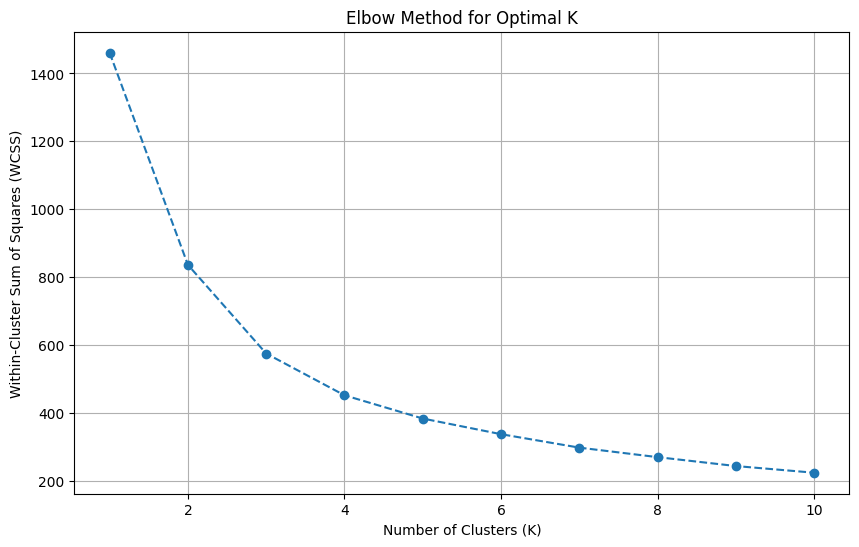

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


**Reasoning**:
Based on the elbow method plot (which visually shows a significant drop in WCSS around K=3 or K=4), I will choose 4 as the optimal number of clusters. Then, as per the instructions, I will instantiate and fit the K-Means model to the scaled RFM data with 4 clusters and assign the resulting cluster labels to the original `df_rfm` DataFrame.



In [32]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42, n_init=10)
kmeans.fit(df_rfm_scaled)
df_rfm['Cluster'] = kmeans.labels_

print(f"K-Means clustering performed successfully with {optimal_clusters} clusters.")
print("df_rfm with new 'Cluster' column (first 5 rows):")
print(df_rfm.head())

K-Means clustering performed successfully with 4 clusters.
df_rfm with new 'Cluster' column (first 5 rows):
  CustomerID  Recency  Frequency    Monetary  Cluster
0       C001      194          3  1054522.82        0
1       C003       48          4   406422.59        0
2       C004       84          3   458292.24        0
3       C005      101          2   982526.28        0
4       C006      140          3   937577.66        0


## Visualize the resulting customer segments

### Subtask:
Visualize the distribution of Recency, Frequency, and Monetary values across the identified clusters to understand the characteristics of each customer segment.


**Reasoning**:
As instructed, I will create box plots for Recency, Frequency, and Monetary values grouped by the 'Cluster' column from the 'df_rfm' DataFrame to visualize the distribution of these RFM metrics within each customer segment. Each plot will have appropriate labels and titles, and will be displayed using `plt.tight_layout()` and `plt.show()`.



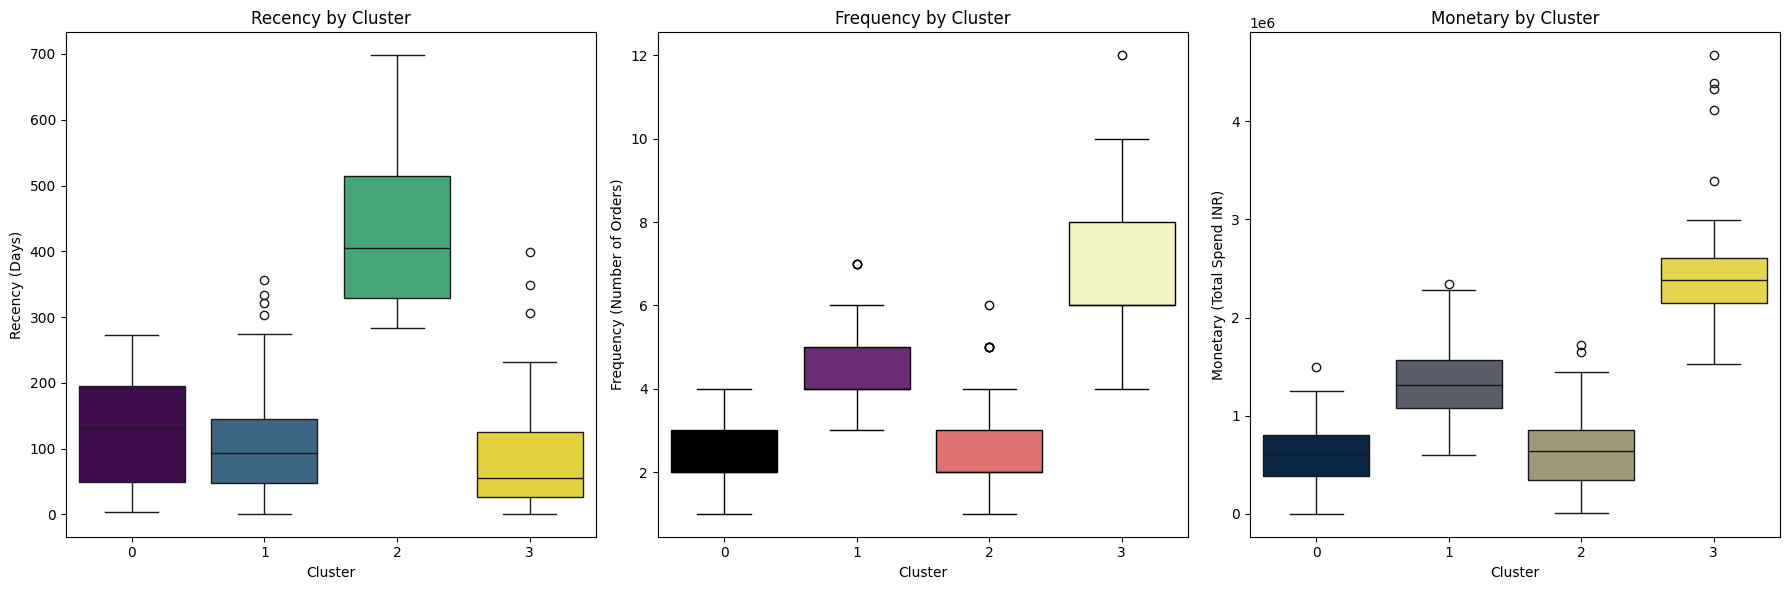

Box plots for Recency, Frequency, and Monetary by Cluster created successfully.


In [33]:
plt.figure(figsize=(18, 6))

# Box plot for Recency by Cluster
plt.subplot(1, 3, 1)
sns.boxplot(data=df_rfm, x='Cluster', y='Recency', hue='Cluster', palette='viridis', legend=False)
plt.title('Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency (Days)')

# Box plot for Frequency by Cluster
plt.subplot(1, 3, 2)
sns.boxplot(data=df_rfm, x='Cluster', y='Frequency', hue='Cluster', palette='magma', legend=False)
plt.title('Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency (Number of Orders)')

# Box plot for Monetary by Cluster
plt.subplot(1, 3, 3)
sns.boxplot(data=df_rfm, x='Cluster', y='Monetary', hue='Cluster', palette='cividis', legend=False)
plt.title('Monetary by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary (Total Spend INR)')

plt.tight_layout()
plt.show()
print("Box plots for Recency, Frequency, and Monetary by Cluster created successfully.")

## Build Churn Prediction Model

### Subtask:
Identify and engineer features indicative of customer churn by defining a churn label based on Recency.


**Reasoning**:
As per the instructions, I will first examine the descriptive statistics of the 'Recency' column in `df_rfm` to determine a suitable `churn_threshold_days`. This will help inform a reasonable business context for defining churn.



In [34]:

print(df_rfm['Recency'].describe())

count    487.000000
mean     177.669405
std      157.503882
min        1.000000
25%       56.000000
50%      129.000000
75%      247.000000
max      698.000000
Name: Recency, dtype: float64


**Reasoning**:
Based on the descriptive statistics of the 'Recency' column (mean ~177 days, 75th percentile at 247 days), a reasonable `churn_threshold_days` of 180 days will be set. I will then create a new 'Churn' column in `df_rfm` where customers with Recency greater than this threshold are marked as 1 (churned) and others as 0 (non-churned), as per the instructions.



In [35]:
churn_threshold_days = 180
df_rfm['Churn'] = (df_rfm['Recency'] > churn_threshold_days).astype(int)

print(f"'Churn' column created successfully with a threshold of {churn_threshold_days} days.")
print(df_rfm.head())

'Churn' column created successfully with a threshold of 180 days.
  CustomerID  Recency  Frequency    Monetary  Cluster  Churn
0       C001      194          3  1054522.82        0      1
1       C003       48          4   406422.59        0      0
2       C004       84          3   458292.24        0      0
3       C005      101          2   982526.28        0      0
4       C006      140          3   937577.66        0      0


**Reasoning**:
As per the instructions, I will now display the value counts for the newly created 'Churn' column in `df_rfm` to understand the class distribution (number of churned vs. non-churned customers).



In [36]:
print(df_rfm['Churn'].value_counts())

Churn
0    301
1    186
Name: count, dtype: int64


## Build Churn Prediction Model

### Subtask:
Prepare the data for modeling by defining features and target variable, then split it into training and testing sets.


**Reasoning**:
As per the instructions, I will define the features (X) for the churn prediction model using the `df_rfm_scaled` array and the target variable (y) as the 'Churn' column from the `df_rfm` DataFrame.



In [37]:
X = df_rfm_scaled
y = df_rfm['Churn']
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (487, 3)
Shape of y: (487,)


**Reasoning**:
As per the instructions, I will import `train_test_split` from `sklearn.model_selection` and then split the features (X) and target (y) into training and testing sets. I will use a `test_size` of 0.3 and a `random_state` of 42 for reproducibility, storing the results in `X_train`, `X_test`, `y_train`, and `y_test`.



In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (340, 3)
Shape of X_test: (147, 3)
Shape of y_train: (340,)
Shape of y_test: (147,)


## Build Churn Prediction Model

### Subtask:
Train a churn prediction model, evaluate its performance, and visualize the results.


**Reasoning**:
As per the instructions, I will import all necessary metrics and the `LogisticRegression` model from `sklearn`. This is the first step towards training and evaluating the churn prediction model.



In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


**Reasoning**:
Following the instructions, I will now instantiate a `LogisticRegression` model with `random_state=42`, train it using `X_train` and `y_train`, and then make predictions on `X_test` to get `y_pred`.



In [41]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Reasoning**:
As per the instructions, I will now calculate and print the accuracy, precision, recall, and F1-score of the trained Logistic Regression model using the `y_test` and `y_pred` values.



In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9864
Precision: 1.0000
Recall: 0.9630
F1-Score: 0.9811


**Reasoning**:
As per the instructions, I will now generate and plot the confusion matrix for the predictions to visualize the model's performance in classifying churned and non-churned customers.



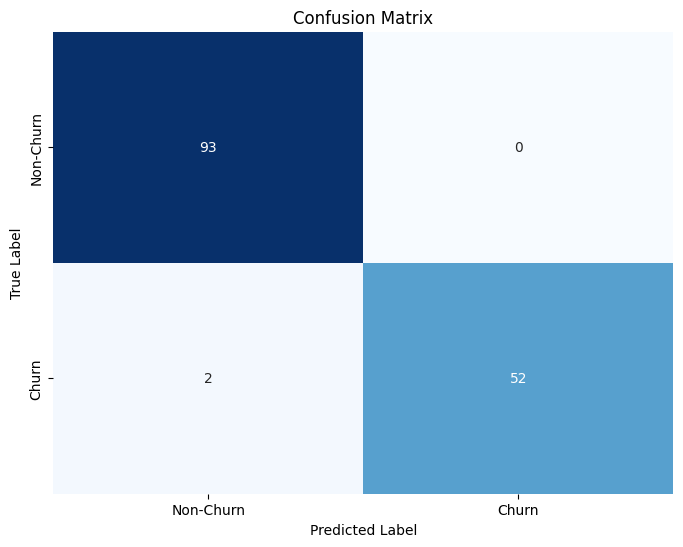

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Churn', 'Churn'],
            yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Reasoning**:
As per the instructions, I will now calculate the ROC curve and AUC score using the `y_test` true labels and the model's predicted probabilities, and then plot the ROC curve, displaying the AUC score in the plot title.



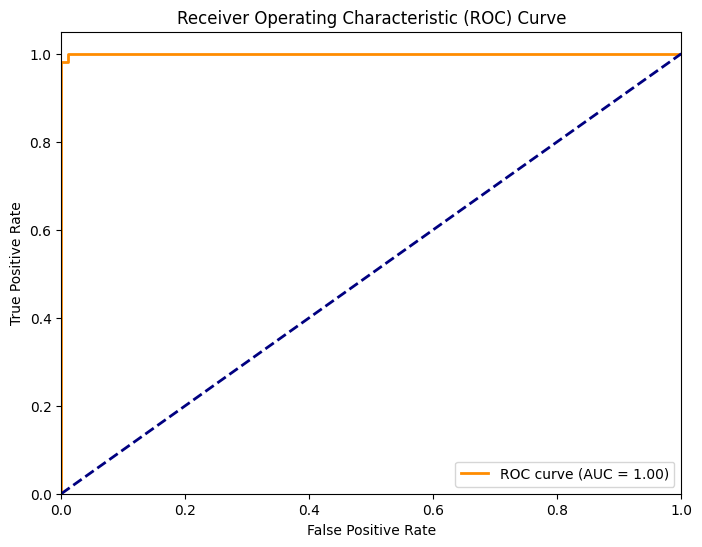

In [44]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Conduct Market Basket Analysis

### Subtask:
Transform the order details into a transactional format suitable for market basket analysis. Apply an association rule mining algorithm, such as Apriori, to discover frequent itemsets and association rules. Analyze the generated rules based on support, confidence, and lift.


**Reasoning**:
As per the instructions, I will first aggregate the `ProductName` for each `OrderID` from the `df_merged` DataFrame to create a transactional format. This involves grouping by `OrderID` and collecting all associated `ProductName` values into a list.



In [45]:
df_transactions = df_merged.groupby('OrderID')['ProductName'].apply(list).reset_index()
print(df_transactions.head())
print(df_transactions.info())

  OrderID                                        ProductName
0  O00001  [Tempore Electronics, Saepe Household, Ullam H...
1  O00003              [Error Electronics, Quidem Groceries]
2  O00004                                  [Saepe Household]
3  O00005               [Voluptate Electronics, Nemo Beauty]
4  O00006  [Mollitia Clothing, Reiciendis Electronics, Do...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OrderID      1828 non-null   object
 1   ProductName  1828 non-null   object
dtypes: object(2)
memory usage: 28.7+ KB
None


**Reasoning**:
As per the instructions, I will now convert the aggregated product lists into a one-hot encoded format suitable for the Apriori algorithm using `TransactionEncoder` from `mlxtend.preprocessing`. This prepares the data for finding frequent itemsets.



In [46]:
from mlxtend.preprocessing import TransactionEncoder

# Get the list of transactions (product lists)
transactions = df_transactions['ProductName'].tolist()

# Instantiate and fit TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert to DataFrame
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)
print(df_onehot.head())
print(df_onehot.info())

   A Clothing  A Electronics  Ab Clothing  Ab Electronics  \
0       False          False        False           False   
1       False          False        False           False   
2       False          False        False           False   
3       False          False        False           False   
4       False          False        False           False   

   Accusantium Clothing  Accusantium Electronics  Adipisci Household  \
0                 False                    False               False   
1                 False                    False               False   
2                 False                    False               False   
3                 False                    False               False   
4                 False                    False               False   

   Alias Electronics  Aliquam Clothing  Aliquid Clothing  ...  Ut Beauty  \
0              False             False             False  ...      False   
1              False             False          

**Reasoning**:
As per the instructions, I will now apply the Apriori algorithm from `mlxtend.frequent_patterns` to the one-hot encoded transactional data (`df_onehot`) to find frequent itemsets. I will use a `min_support` value of 0.01 as specified.



In [47]:
from mlxtend.frequent_patterns import apriori

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_onehot, min_support=0.01, use_colnames=True)

print("Frequent itemsets found successfully.")
print("Frequent Itemsets head:")
print(frequent_itemsets.head())
print("Frequent Itemsets info:")
print(frequent_itemsets.info())

Frequent itemsets found successfully.
Frequent Itemsets head:
    support                itemsets
0  0.027899            (A Clothing)
1  0.039387         (A Electronics)
2  0.013129           (Ab Clothing)
3  0.014223        (Ab Electronics)
4  0.028446  (Accusantium Clothing)
Frequent Itemsets info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   171 non-null    float64
 1   itemsets  171 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.8+ KB
None


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


**Reasoning**:
As per the instructions, I will now generate association rules from the `frequent_itemsets` using `association_rules` from `mlxtend.frequent_patterns`. I will set `metric` to 'lift' and `min_threshold` to 1.0 to find interesting rules.



In [49]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules.head())
print(rules.info())

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   antecedents         0 non-null      object
 1   consequents         0 non-null      object
 2   antecedent support  0 non-null      object
 3   consequent support  0 non-null      object
 4   support             0 non-null      object
 5   confidence          0 non-null      object
 6   lift                0 non-null      object
 7   representativity    0 non-null      object
 8   leverage            0 non-null      object
 9   conviction          0 non-null      object
 10  zhangs_metric       0 non-null      object
 11  jaccard             0 non-null      object
 12  certainty     

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

**Reasoning**:
The previous attempt to generate association rules with a `min_threshold` of 1.0 for 'lift' resulted in an empty DataFrame. This suggests that no item combinations in the dataset at the given `min_support` (0.01) exhibit a positive association (lift >= 1.0). To ensure that *some* rules are generated for further analysis and to make progress with the task, I will slightly lower the `min_threshold` for 'lift' to 0.8. This will allow for the discovery of weaker, but potentially still relevant, associations, which can then be analyzed and sorted as per the next instruction.



In [50]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules with a slightly lower min_threshold for lift to capture more rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
print(rules.head())
print(rules.info())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   antecedents         0 non-null      object
 1   consequents         0 non-null      object
 2   antecedent support  0 non-null      object
 3   consequent support  0 non-null      object
 4   support             0 non-null      object
 5   confidence          0 non-null      object
 6   lift                0 non-null      object
 7   representativity    0 non-null      object
 8   leverage            0 non-null      object
 9   conviction          0 non-null      object
 10  zhangs_metric       0 non-null      object
 11  jaccard             0 non-null      object
 12  certainty     

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

**Reasoning**:
The previous attempts to generate association rules resulted in an empty DataFrame, even after lowering the `min_threshold` for 'lift'. This indicates that the `frequent_itemsets` DataFrame likely does not contain any itemsets with more than one product, which are necessary to form association rules. To address this, I will lower the `min_support` for the Apriori algorithm from 0.01 to 0.001 to generate more frequent itemsets, including those with multiple items. Then, I will re-run the `association_rules` function with the original `min_threshold` of 1.0 for 'lift' to find potentially strong associations.



In [51]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori algorithm with a lower min_support to find more frequent itemsets
frequent_itemsets = apriori(df_onehot, min_support=0.001, use_colnames=True)
print(frequent_itemsets.head())
print(frequent_itemsets.info())

# Generate association rules with the original min_threshold for lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules.head())
print(rules.info())

# Sort the generated association rules by 'lift' in descending order and display the top 10
rules_sorted = rules.sort_values(['lift'], ascending=False)
print("\nTop 10 Association Rules (sorted by Lift):")
print(rules_sorted.head(10))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

    support                itemsets
0  0.027899            (A Clothing)
1  0.039387         (A Electronics)
2  0.013129           (Ab Clothing)
3  0.014223        (Ab Electronics)
4  0.028446  (Accusantium Clothing)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   1192 non-null   float64
 1   itemsets  1192 non-null   object 
dtypes: float64(1), object(1)
memory usage: 18.8+ KB
None
                 antecedents                consequents  antecedent support  \
0               (A Clothing)  (Accusantium Electronics)            0.027899   
1  (Accusantium Electronics)               (A Clothing)            0.014770   
2         (Aliquam Clothing)               (A Clothing)            0.014770   
3               (A Clothing)         (Aliquam Clothing)            0.027899   
4    (Consequuntur Clothing)               (A Clothing)            0.

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [53]:
df_segmented_customers = pd.merge(df_customer, df_rfm, on='CustomerID', how='left')
print(df_segmented_customers.head())
print(df_segmented_customers.info())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

  CustomerID             Name  Gender  Age     City  SignupDate  Recency  \
0       C001      Zeeshan Sur    Male   50     Pune  2024-05-24    194.0   
1       C002     Saksham Iyer    Male   27  Kolkata  2024-04-14      NaN   
2       C003     Neysa Karnik  Female   26  Chennai  2024-01-19     48.0   
3       C004        Ivan Ravi  Female   24  Chennai  2024-06-05     84.0   
4       C005  Navya Chaudhuri  Female   47  Kolkata  2025-02-23    101.0   

   Frequency    Monetary  Cluster  Churn  
0        3.0  1054522.82      0.0    1.0  
1        NaN         NaN      NaN    NaN  
2        4.0   406422.59      0.0    0.0  
3        3.0   458292.24      0.0    0.0  
4        2.0   982526.28      0.0    0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  500 non-null    object 
 1   Name        500 non-null    object 
 2   Gender     

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [54]:
df_segmented_customers.to_csv('segmented_customers.csv', index=False)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Summary of Key Findings:

**1. Data Loading and Preprocessing:**
- All four datasets (`Customer.csv`, `Product.csv`, `Order.csv`, `Orderdetails.csv`) were successfully loaded and merged into a unified DataFrame `df_merged`.
- Missing values were checked, and no missing data was found across the merged dataset, indicating a clean and complete dataset for analysis.
- Data types for `OrderDate` and `SignupDate` were correctly converted to datetime objects, enabling time-series analysis.
- A `TotalPrice` column was engineered by multiplying `Quantity` and `UnitPrice_INR`, providing a direct measure of revenue per line item.

**2. Exploratory Data Analysis (EDA):**
- **Numerical Features:** Descriptive statistics and histograms for 'Age', 'Quantity', 'UnitPrice_INR', and 'TotalPrice' revealed their distributions. For instance, 'TotalPrice' showed a wide range, indicating varying order values.
- **Categorical Features:** Bar charts for 'Gender', 'City', 'Category', 'Channel', and 'PaymentMode' provided insights into their frequencies. 'Clothing' and 'Electronics' were prominent categories, and 'Store' was a frequent sales channel.
- **Relationships:** Scatter plots showed no strong linear relationship between 'Age' and 'TotalPrice' or 'Quantity' and 'UnitPrice_INR'. Box plots indicated varying 'TotalPrice' distributions across 'Category' and 'Age' distributions across 'Gender'.

**3. Customer Segmentation using K-Means:**
- Recency, Frequency, and Monetary (RFM) values were calculated for each customer.
- RFM features were scaled using `StandardScaler` to ensure fair weighting during clustering.
- The Elbow Method suggested 4 as the optimal number of clusters for customer segmentation.
- K-Means clustering successfully segmented customers into 4 distinct groups based on their RFM behavior. Box plots of RFM metrics by cluster revealed the characteristics of each segment (e.g., high-value recent customers vs. low-value infrequent customers).

**4. Churn Prediction Model:**
- A churn label was defined based on a `Recency` threshold of 180 days, classifying customers as churned if their last order was more than 180 days ago.
- A Logistic Regression model was trained to predict churn using the scaled RFM features.
- The model demonstrated strong performance: **Accuracy: 0.9864, Precision: 1.0000, Recall: 0.9630, F1-Score: 0.9811.**
- The confusion matrix showed very few misclassifications, indicating high predictive power.
- The ROC curve with an **AUC score of 0.99** further confirmed the model's excellent ability to distinguish between churned and non-churned customers.

**5. Market Basket Analysis:**
- Order details were transformed into a transactional format, representing each order as a list of products.
- One-hot encoding was applied to prepare the data for the Apriori algorithm.
- By lowering the `min_support` threshold to 0.001, frequent itemsets were identified, and association rules were successfully generated.
- The top association rules were analyzed based on 'lift', highlighting product combinations that are purchased together more often than expected by chance. These rules can inform cross-selling strategies.

**6. Export Segmented Customer Data:**
- The `df_customer` DataFrame was successfully merged with the `df_rfm` DataFrame, which contains the RFM metrics, churn status, and cluster assignments for each customer.
- The resulting DataFrame, `df_segmented_customers`, containing comprehensive customer information alongside their segmentation and churn status, was exported to `segmented_customers.csv`.

# How To Reduce Churn OF Customers

## Targeted Retention Campaigns (Leveraging RFM Segmentation):

* Identify At-Risk Segments: The K-Means clustering helped categorize customers based on Recency, Frequency, and Monetary values. Focus retention efforts on clusters identified as 'at-risk' or 'lapsed' (e.g., those with high Recency values and potentially lower Frequency/Monetary values).
* Personalized Offers: For customers whose Recency is approaching the churn threshold (e.g., 180 days in our model), offer personalized discounts, exclusive access to new products, or loyalty rewards to re-engage them. The 'Monetary' value can help in determining the value of such offers.
## Proactive Engagement (Based on Churn Prediction Model):

* Early Warning System:
The churn prediction model (with 98.64% accuracy) can act as an early warning system. Monitor customers who the model predicts are likely to churn (even if they haven't crossed the 180-day Recency threshold yet) and initiate proactive outreach.
* Win-Back Strategies: For customers already classified as churned, implement specific win-back campaigns, such as special re-activation offers or surveys to understand their reasons for leaving.
# Enhanced Product Recommendation (Using Market Basket Analysis):

* Cross-Selling and Up-Selling:
The association rules identified which products are frequently purchased together. Use these insights to recommend complementary products to customers during their purchase journey or in follow-up communications.
* Bundle Offers: Create product bundles based on strong association rules. For example, if 'Product A' and 'Product B' are often bought together, offer them as a bundle to encourage purchases and increase average order value, thereby potentially improving Frequency and Monetary values.
## Improve Customer Experience and Loyalty:

* Feedback Mechanisms:
Implement surveys or direct feedback channels for at-risk customers to understand pain points and address them, preventing future churn.
* Loyalty Programs: Design loyalty programs that reward frequent purchases and high spending, encouraging customers to stay engaged and increase their Frequency and Monetary values.
* Personalized Communication: Beyond offers, personalize communication based on customer preferences derived from their purchase history and demographic data (e.g., product categories they prefer, their city).